## Práctica o 
### Miguel Alfonso Zapata De La Cruz

<img src= 'Practica_0.jpg' width="600px">

In [2]:
import numpy as np
import matplotlib.pyplot as mpl
from scipy.stats import norm 
#Practica

### Generamos 100 veces los primeros 10 elementos de forma aleatoria 

In [3]:
mu = 0
sigma = 1.0 
dis_1 = []
dis_2 = []
dis_3 = []
for k in range(100): 
  dis_1.append(np.random.normal(mu,sigma,10))


## De forma análoga para 100 elementos 

In [3]:
for k in range(100): 
  dis_2.append(np.random.normal(mu,sigma,100))


## Y finalmente para 1000 elementos 

In [4]:
for k in range(100):
    dis_3.append(np.random.normal(mu,sigma,1000))

## Ahora calculamos los promedios para 10, 100 y 1000 elementos 

In [5]:
prom1 = []
prom2 = []
prom3 = []

for i in dis_1:
    prom1.append(np.mean(i))

for j in dis_2: 
    prom2.append(np.mean(j))

for k in dis_3: 
    prom3.append(np.mean(k))

s1 = np.std(prom1)
s2 = np.std(prom2)
s3 = np.std(prom3)

## Recordando la formula para la desviación estándar $$ \sigma \thickapprox  \frac{1}{\sqrt{N}} $$
## Calculamos 

In [6]:
s11 = (10)**(-0.5)
s22 = (100)**(-0.5)
s33 = (1000)**(-0.5)

In [7]:
# Para 10 elementos tenemos 
print(s1,s11)
print(s2,s22)
print(s3,s33)

#Vemos que se cumple la aproximación

0.2905292709438213 0.31622776601683794
0.10401130243805054 0.1
0.029223782410183096 0.03162277660168379


## Lo cual verifica que aproximadamente $ \sigma \thickapprox  \frac{1}{\sqrt{N}} $

## Segunda parte 

In [5]:
# 1) Leemos e imprimimos el archivo 
dgauss = np.loadtxt('PDF_double_gauss_2021.txt')
print(dgauss)

[[0.00000000e+00 7.08271527e-09]
 [1.00000000e-02 7.21797517e-09]
 [2.00000000e-02 7.35574896e-09]
 ...
 [2.99800000e+01 5.72470107e-06]
 [2.99900000e+01 5.64269933e-06]
 [3.00000000e+01 5.56181040e-06]]


## Usando el formula de los intervalos, en la regla de Simpson compuestas en la forma $ h = \frac{b-a}{n}$, donde $a$ y $b$ son los extremos del intervalo y $n$, el número de subintervalos

In [6]:
# 2) Calculando el elemento dx 
i = 0
x = [fila[i] for fila in dgauss]
d = len(x)
j = 1 
y = [fila[j] for fila in dgauss]

dx = (x[-1]-x[0])/(d-1)
print('El tamaño de dx es',dx)


El tamaño de dx es 0.01


In [7]:
# 3) Verificamos 
j = 1
pdf_arr = [fila[j] for fila in dgauss]
sum = np.sum(pdf_arr)
print('El resultado de la multiplación es ',sum*dx)

#Podemos ver que el resultado es muy cerca de la unidad. 

El resultado de la multiplación es  0.9999963524247931


In [8]:
# 4) Ahora encontramos cumulative distribution function (CDF), para esto recordemos que 
# se obtiene al sumar la función de densidad de probabilidad. Así 
x_array   = dgauss[:,0]
pdf_array = dgauss[:,1] 

comul_array =np.cumsum(pdf_array)
comul_array



array([7.08271527e-09, 1.43006904e-08, 2.16564394e-08, ...,
       9.99996240e+01, 9.99996297e+01, 9.99996352e+01])

Text(0, 0.5, 'Probabilty Distribution Function (PDF)')

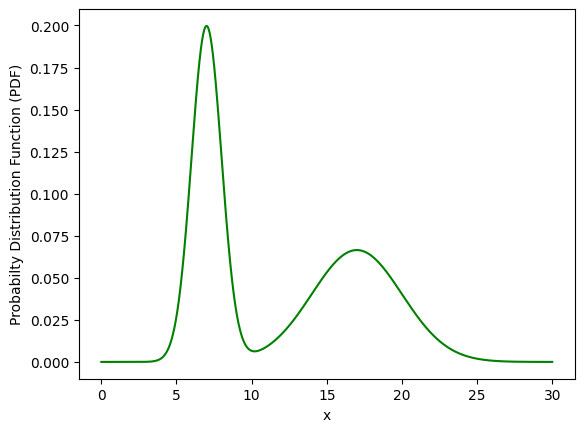

In [9]:
# 5) Realizamos los plots de PDF y CDF 

pdf_plot = mpl.plot(x_array,pdf_array, color = 'green' )
mpl.xlabel('x')
mpl.ylabel('Probabilty Distribution Function (PDF)')


Text(0, 0.5, 'cumulative distribution function (CDF)')

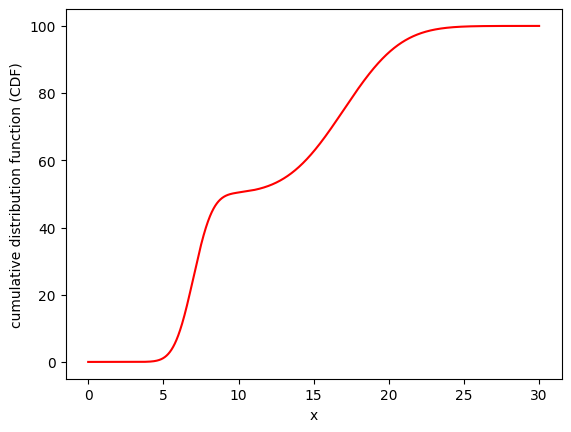

In [10]:
cdf_plot = mpl.plot(x_array,comul_array, color = 'red' )
mpl.xlabel('x')
mpl.ylabel('cumulative distribution function (CDF)')

In [21]:
# 6) 
t = len(comul_array)


myrand_arr = []
for k in range(t):
 myrand_arr.append(np.random.rand(20000))
 
myrand_arr = np.array(myrand_arr)
myrand_arr


array([[0.55877557, 0.07320744, 0.87422686, ..., 0.17302827, 0.13538371,
        0.30068653],
       [0.97784701, 0.62078344, 0.47846471, ..., 0.31309221, 0.21331919,
        0.83497792],
       [0.89258737, 0.93470385, 0.09043407, ..., 0.51186848, 0.8921672 ,
        0.52389165],
       ...,
       [0.79984138, 0.12386314, 0.77759569, ..., 0.01824046, 0.29370585,
        0.66928691],
       [0.87433781, 0.40462956, 0.8432138 , ..., 0.08994684, 0.30343069,
        0.80631813],
       [0.81439039, 0.57006492, 0.71645101, ..., 0.07115569, 0.0709198 ,
        0.94720878]])

(array([[558., 622., 602., 610., 609.],
        [635., 581., 613., 547., 625.],
        [606., 602., 576., 581., 636.],
        ...,
        [577., 629., 600., 600., 595.],
        [606., 589., 611., 599., 596.],
        [562., 625., 626., 592., 596.]]),
 array([2.39289988e-09, 2.00000000e-01, 3.99999997e-01, 5.99999995e-01,
        7.99999992e-01, 9.99999990e-01]),
 <a list of 20000 BarContainer objects>)

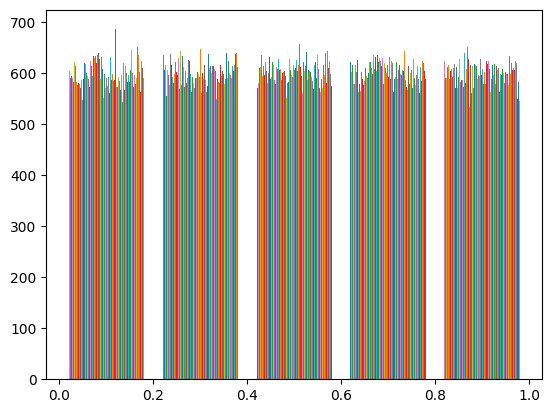

In [22]:
mpl.hist(myrand_arr,bins=5)